<a href="https://colab.research.google.com/github/anshulzutshi/deep_learning/blob/main/stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/cs189/hw4_release

Mounted at /content/drive
/content/drive/MyDrive/cs189/hw4_release


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.io
import sys
import os
import math
from numpy.ma.core import shape

In [ ]:
def normalize(data):
  return (data - np.mean(data))/np.std(data)

In [ ]:
#load and normalize data
np.random.seed(123)
wine = scipy.io.loadmat("data_wine.mat")
wine_x = normalize(wine['X'])
wine_x = np.append(wine_x, np.full(((wine['X']).shape[0], 1), 1), axis=1) # add fake dimension of 1s
wine_x_test = normalize(wine['X_test'])
wine_x_test = np.append(wine_x_test, np.full(((wine['X_test']).shape[0], 1), 1), axis=1) # add fake dimension of 1s
wine_y = wine['y']
#shuffle data
wine_pairs = [(wine_x[i], wine_y[i][0]) for i in range(len(wine_x))]
shuffled = np.random.permutation(wine_pairs)
wine_valid = shuffled[:1200] # validation set 20% of data
wine_train = shuffled[1200:] # training set 80% of data
wine_all = shuffled
wine_valid_x = [pair[0] for pair in wine_valid]
wine_valid_y = [pair[1] for pair in wine_valid]
wine_train_x = [pair[0] for pair in wine_train]
wine_train_y = [pair[1] for pair in wine_train]
wine_x_new = [pair[0] for pair in wine_all]
wine_y_new = [pair[1] for pair in wine_all]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
def s(x):
  return 1/ (1 + math.e**(-x))

In [ ]:
def cost(X, y, w, reg_param):
  s_vec = scipy.special.expit(np.matmul(X, w))
  s_vec = np.ravel(s_vec)
  y = np.ravel(y)
  all_one = np.full((y.shape[0],), 1)
  final_cost = np.dot(-y, np.log(s_vec)) - np.dot(np.subtract(all_one, y), np.log(np.subtract(all_one, s_vec))) + reg_param * np.sum(np.square(w))
  return final_cost


In [ ]:
def gradient(X, y, S):
  return np.matmul(np.transpose(X), S - y)

In [ ]:
#3.2 Batch Gradient Desc
learning_rates_batch = 0.001
reg_params_batch = 0.001
batch_costs = []
X = np.array(wine_train_x)
y = np.array(wine_train_y)
y.shape = (len(wine_train_y),1)
w = (np.full((13, 1), 0))
for iteration in range(300):
  grad = gradient(X, np.array(scipy.special.expit(np.matmul(X, w))), y)
  w = w - ((learning_rates_batch * grad) + (reg_params_batch * w))
  pred = np.rint(np.array(scipy.special.expit(np.matmul(X, w))))
  batch_costs.append(cost(X, y, w, reg_params_batch))
X_val = np.array(wine_valid_x)
y_val = np.array(wine_valid_y)
y_val.shape = (len(wine_valid_y),1)
pred_val = np.rint(np.array(scipy.special.expit(np.matmul(X_val, w))))
# print("Accuracy: ", np.sum(pred_val == y_val) / len(y_val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [ ]:
#3.2 cost batch gradient desc plot
plt.plot(range(300), batch_costs)
plt.title('Number of Training Iterations Vs Cost for Batch Gradient Descent')
plt.xlabel('Number of Training Iterations')
plt.ylabel('Costs')
plt.show()

In [ ]:
#formula for l2 batch log gradient desc
# L(z, y) = -y * ln(z) - (1- y)*ln(1 - z) + lambda * w_2^2 where z = h(x), y is true label, and w_2^2 is the norm squared of w
# log regression fn: 1/ (1 + e ^-(w*x+alpha))
#gradient desc rule: w <- w + epsilon*X.T*(y - s(Xw))
#stochastic gradient desc: w + epsilon*(y_i - s(X_i*w))X_i
#start from w = 0
w = 0
epsilon = 0.1
w = w + epsilon * np.matmul(wine_x.T, (wine_y - s(wine_x*w)))
w

In [ ]:
def stochastic(X_i, y_i, w):
  X_i.shape = (13, 1)
  Xit = np.transpose(X_i)
  return -(y_i - s(np.matmul(Xit, w)))* X_i

In [ ]:
#3.4 Stochastic gradient desc
learning_rates_stoch = 0.01
reg_params_stoch = 0.0001
iterations = [100, 500, 1000, 5000, 20000]
X = np.array(wine_train_x)
y = np.array(wine_train_y)
y.shape = (len(wine_train_y),1)
w = (np.full((13, 1), 0))
stoch_costs = []
for i in range(300):
  index = i % len(y)
  stoch = stochastic(X[index], y[index], w)
  w = w - ((learning_rates_stoch * stoch) + (reg_params_stoch * w))
  pred = np.rint(np.array(scipy.special.expit(np.matmul(X, w))))
  stoch_costs.append(cost(X, y, w, rp))
X_val = np.array(wine_valid_x)
y_val = np.array(wine_valid_y)
y_val.shape = (len(wine_valid_y), 1)
pred_val = np.rint(np.array(scipy.special.expit(np.matmul(X_val, w))))
# print("Accuracy: ", np.sum(pred_val == y_val) / len(y_val))

accuracy:  0.7925


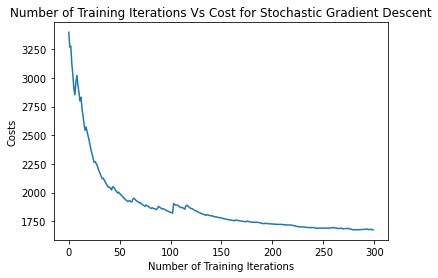

In [ ]:
#3.4 cost stochastic gradient desc plot
plt.plot(range(300), stoch_costs)
plt.title('Number of Training Iterations Vs Cost for Stochastic Gradient Descent')
plt.xlabel('Number of Training Iterations')
plt.ylabel('Costs')
plt.show()

In [ ]:
#3.5 Stochastic gradient desc w shrinking step size
delta = 0.1
rp = 0.0001
X = np.array(wine_train_x)
y = np.array(wine_train_y)
y.shape = (len(wine_train_y),1)
w = (np.full((13, 1), 0))
costs = []
for i in range(1,300):
  index = i % len(y)
  stoch = stochastic(X[index], y[index], w)
  et = delta / i
  w = w - ((et * stoch) + (rp * w))
  costs.append(cost(X, y, w, rp))
X_val = np.array(wine_valid_x)
y_val = np.array(wine_valid_y)
y_val.shape = (len(wine_valid_y),1)
pred_val = np.rint(np.array(scipy.special.expit(np.matmul(X_val, w))))
# print("Accuracy: ", np.sum(pred_val == y_val) / len(y_val))

accuracy:  0.76


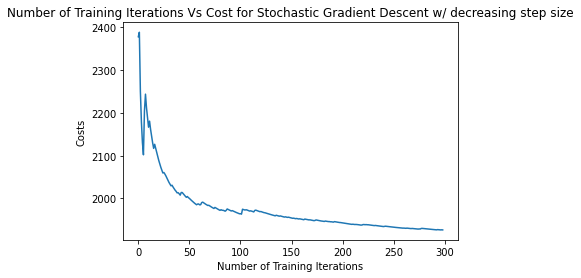

In [ ]:
#3.5 cost stochastic gradient w/ decreasing step size desc plot
plt.plot(range(299), costs)
plt.title('Number of Training Iterations Vs Cost for Stochastic Gradient Descent w/ decreasing step size')
plt.xlabel('Number of Training Iterations')
plt.ylabel('Costs')
plt.show()

In [ ]:
# 3.6 Batch Gradient Descent Kaggle
rp = 0.0001
lr = 0.0001
X_test = np.array(wine_x_new)
y_test = np.array(wine_y_new)
y_test.shape = (len(wine_y_new),1)
w = (np.full((13, 1), 0))
for i in range(20000):
  grad = gradient(X_test, np.array(scipy.special.expit(np.matmul(X_test, w))), y_test)
  w = w - ((lr * grad) + (rp * w))
wine_pred = np.rint(np.array(scipy.special.expit(np.matmul(wine_x_test, w))))

In [ ]:
#3.6 Stochastic Gradient Descent Kaggle
rp = 0.0001
lr = 0.0001
X = np.array(wine_x_new)
y = np.array(wine_y_new)
y.shape = (len(wine_y_new),1)
for i in range(20000):
  index = i % len(y)
  stoch = stochastic(X[index], y[index], w)
  w = w - ((learning_rates_stoch * stoch) + (reg_params_stoch * w))
wine_pred_stoch = np.rint(np.array(scipy.special.expit(np.matmul(wine_x_test, w))))
#wine_pred_stoch

In [ ]:
wine_pred_final = [wine_pred_stoch[i][0] for i in range(len(wine_pred_stoch))]
wine_pred_true_final = []
for i in wine_pred_final:
  wine_pred_true_final.append(int(i))
print(len(wine_pred_true_final), sum(wine_pred_true_final))

497 121


In [ ]:
def results_to_csv(y_test, dataset):
    y_test = np.array(y_test)
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1.
    df.to_csv(f"{dataset}.csv", index_label='Id')

In [ ]:
results_to_csv(wine_pred_true_final, "wine")

In [ ]:
#5.1
def isocontour(p):
  x, y = np.mgrid[-5:5:.01, -5:5:.01]
  z = (np.abs(x) ** p + np.abs(y) ** p) ** (1/p)
  pos = np.dstack((x, y))
  fig = plt.figure()
  temp = fig.add_subplot(111)
  contour = temp.contour(x, y, z)
  temp.set_ylabel('w2')
  temp.set_xlabel('w1')
  plt.title('Isocontour for p = ' + str(p))
  temp.clabel(contour, fontsize=10)

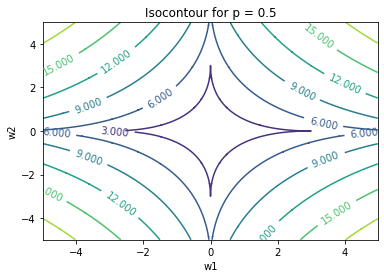

In [ ]:
#5.1a
isocontour(0.5)

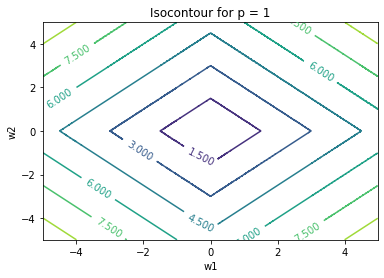

In [ ]:
#5.1b
isocontour(1)

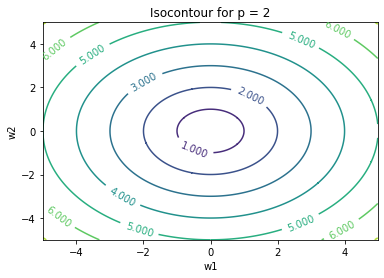

In [ ]:
#5.1c
isocontour(2)